In [40]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image

In [43]:
path = r'E:\Image Datasets\Style Transfer Images\Content Images\GoldenGate.jpg'
image_size = 512

img = np.array(Image.open(path).resize([image_size, image_size]))
preprocess_input = lambda x: tf.keras.applications.inception_v3.preprocess_input(tf.expand_dims(tf.cast(x, tf.float32), axis = 0))
deprocess_input = lambda x: tf.cast((x+1)*127.5, tf.int32)

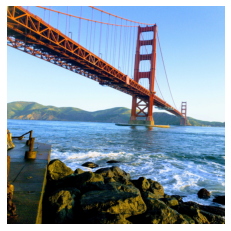

In [44]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [45]:
LAYERS = ['mixed3', 'mixed5']
base_model = tf.keras.applications.InceptionV3(include_top = False, weights = 'imagenet')

outs = [base_model.get_layer(layer).output for layer in LAYERS]
our_model = tf.keras.models.Model(base_model.inputs, outs)

In [46]:
def loss_function(preds):
    loss = 0
    for i in preds:
        loss += tf.math.reduce_mean(i)
    return loss

In [51]:
lr = 0.01
steps = 100
gen_img = preprocess_input(img)

for s in range(steps):
    with tf.GradientTape() as tape:
        tape.watch(gen_img)
        preds = our_model(gen_img)
        loss = loss_function(preds)
    grads = tape.gradient(loss, gen_img)
    grads /= tf.math.reduce_std(grads) + 1e-8
    gen_img += lr * grads
    
    gen_img = tf.clip_by_value(gen_img, -1, 1)
    print(f'Step: {s} \t Loss: {loss}')

Step: 0 	 Loss: 0.6037201881408691
Step: 1 	 Loss: 0.6463266611099243
Step: 2 	 Loss: 0.7050748467445374
Step: 3 	 Loss: 0.7658746242523193
Step: 4 	 Loss: 0.819200873374939
Step: 5 	 Loss: 0.8679470419883728
Step: 6 	 Loss: 0.9115253686904907
Step: 7 	 Loss: 0.9525653123855591
Step: 8 	 Loss: 0.9937841892242432
Step: 9 	 Loss: 1.0316994190216064
Step: 10 	 Loss: 1.0657083988189697
Step: 11 	 Loss: 1.0988843441009521
Step: 12 	 Loss: 1.1306122541427612
Step: 13 	 Loss: 1.1603599786758423
Step: 14 	 Loss: 1.1867845058441162
Step: 15 	 Loss: 1.2146903276443481
Step: 16 	 Loss: 1.2393677234649658
Step: 17 	 Loss: 1.263786792755127
Step: 18 	 Loss: 1.2879202365875244
Step: 19 	 Loss: 1.3095303773880005
Step: 20 	 Loss: 1.3310561180114746
Step: 21 	 Loss: 1.3510141372680664
Step: 22 	 Loss: 1.3704144954681396
Step: 23 	 Loss: 1.3887230157852173
Step: 24 	 Loss: 1.4081376791000366
Step: 25 	 Loss: 1.423236608505249
Step: 26 	 Loss: 1.4422322511672974
Step: 27 	 Loss: 1.4570655822753906
Step:

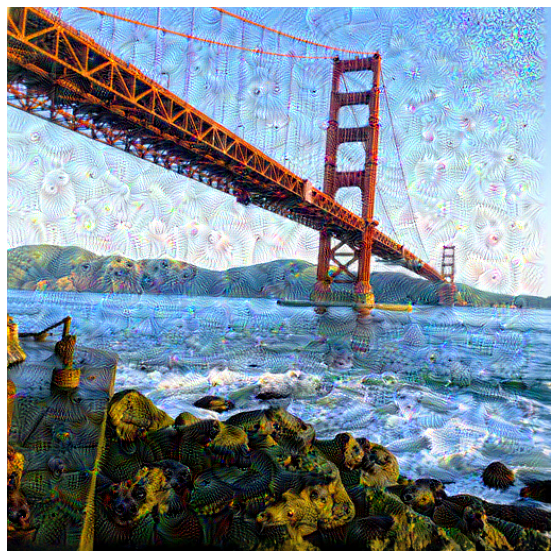

In [52]:
plt.figure(figsize = (10, 10))
plt.imshow(deprocess_input(gen_img)[0])
plt.axis('off')
plt.show()

### Using Octaves

In [73]:
deep_imgs = []
Octave_scale = 1.3
gen_img = img
steps = 100
lr = 0.01

for i in range(-2, 3):
    img_size = int(image_size * (Octave_scale ** i))
    print(f'\n\n\nImage size: {img_size}')
    gen_img = preprocess_input(tf.image.resize(gen_img, [img_size, img_size]))
    
    for s in range(steps):
        with tf.GradientTape() as tape:
            tape.watch(gen_img)
            preds = our_model(gen_img)
            loss = loss_function(preds)
        grads = tape.gradient(loss, gen_img)
        grads /= tf.math.reduce_std(grads) + 1e-8
        gen_img += lr * grads
        
        gen_img = tf.clip_by_value(gen_img, -1, 1)
        print(f'Step: {s} \t Loss: {loss}')
    
    gen_img = deprocess_input(gen_img)[0]
    deep_imgs.append(gen_img)
    




Image size: 302
Step: 0 	 Loss: 0.6899890303611755
Step: 1 	 Loss: 0.7223740816116333
Step: 2 	 Loss: 0.784396231174469
Step: 3 	 Loss: 0.8432679176330566
Step: 4 	 Loss: 0.8824723958969116
Step: 5 	 Loss: 0.9284313917160034
Step: 6 	 Loss: 0.9680075645446777
Step: 7 	 Loss: 1.0055711269378662
Step: 8 	 Loss: 1.0394585132598877
Step: 9 	 Loss: 1.0715564489364624
Step: 10 	 Loss: 1.1047165393829346
Step: 11 	 Loss: 1.133048176765442
Step: 12 	 Loss: 1.1602842807769775
Step: 13 	 Loss: 1.1908066272735596
Step: 14 	 Loss: 1.2147555351257324
Step: 15 	 Loss: 1.2429323196411133
Step: 16 	 Loss: 1.2661659717559814
Step: 17 	 Loss: 1.2861684560775757
Step: 18 	 Loss: 1.3084843158721924
Step: 19 	 Loss: 1.3283847570419312
Step: 20 	 Loss: 1.3517924547195435
Step: 21 	 Loss: 1.3657917976379395
Step: 22 	 Loss: 1.393148422241211
Step: 23 	 Loss: 1.4051799774169922
Step: 24 	 Loss: 1.4258027076721191
Step: 25 	 Loss: 1.4412777423858643
Step: 26 	 Loss: 1.4577014446258545
Step: 27 	 Loss: 1.475

Step: 31 	 Loss: 1.9248671531677246
Step: 32 	 Loss: 1.938614010810852
Step: 33 	 Loss: 1.9501938819885254
Step: 34 	 Loss: 1.9602813720703125
Step: 35 	 Loss: 1.9718364477157593
Step: 36 	 Loss: 1.9853500127792358
Step: 37 	 Loss: 1.9959075450897217
Step: 38 	 Loss: 2.0077638626098633
Step: 39 	 Loss: 2.018160820007324
Step: 40 	 Loss: 2.0297622680664062
Step: 41 	 Loss: 2.0411765575408936
Step: 42 	 Loss: 2.053194284439087
Step: 43 	 Loss: 2.0613858699798584
Step: 44 	 Loss: 2.0730724334716797
Step: 45 	 Loss: 2.0822410583496094
Step: 46 	 Loss: 2.089973211288452
Step: 47 	 Loss: 2.0981903076171875
Step: 48 	 Loss: 2.1094870567321777
Step: 49 	 Loss: 2.1169471740722656
Step: 50 	 Loss: 2.130429744720459
Step: 51 	 Loss: 2.1348915100097656
Step: 52 	 Loss: 2.1483631134033203
Step: 53 	 Loss: 2.1526265144348145
Step: 54 	 Loss: 2.1646199226379395
Step: 55 	 Loss: 2.169501781463623
Step: 56 	 Loss: 2.1814990043640137
Step: 57 	 Loss: 2.1855101585388184
Step: 58 	 Loss: 2.200123548507690

Step: 63 	 Loss: 2.412426471710205
Step: 64 	 Loss: 2.4200363159179688
Step: 65 	 Loss: 2.4307146072387695
Step: 66 	 Loss: 2.436923027038574
Step: 67 	 Loss: 2.447223663330078
Step: 68 	 Loss: 2.4532861709594727
Step: 69 	 Loss: 2.4630298614501953
Step: 70 	 Loss: 2.4695301055908203
Step: 71 	 Loss: 2.4778475761413574
Step: 72 	 Loss: 2.4864773750305176
Step: 73 	 Loss: 2.493134021759033
Step: 74 	 Loss: 2.5010225772857666
Step: 75 	 Loss: 2.511341094970703
Step: 76 	 Loss: 2.514758586883545
Step: 77 	 Loss: 2.5245885848999023
Step: 78 	 Loss: 2.532510757446289
Step: 79 	 Loss: 2.5388288497924805
Step: 80 	 Loss: 2.54371976852417
Step: 81 	 Loss: 2.5548908710479736
Step: 82 	 Loss: 2.558518409729004
Step: 83 	 Loss: 2.5703988075256348
Step: 84 	 Loss: 2.5730512142181396
Step: 85 	 Loss: 2.5814929008483887
Step: 86 	 Loss: 2.583515167236328
Step: 87 	 Loss: 2.597994089126587
Step: 88 	 Loss: 2.5978119373321533
Step: 89 	 Loss: 2.6103572845458984
Step: 90 	 Loss: 2.6131343841552734
Step

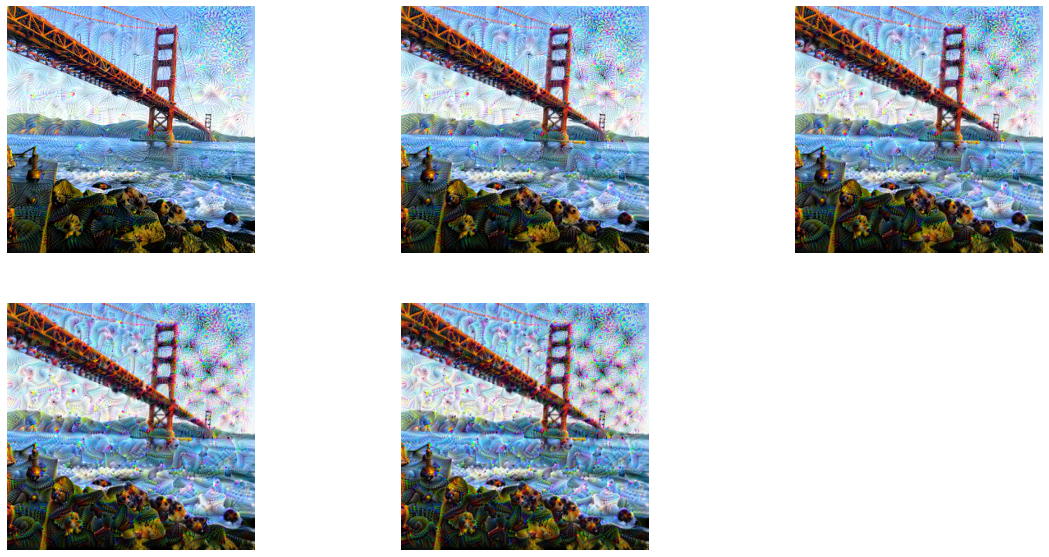

In [75]:
plt.figure(figsize = (20, 10))

for n, i in enumerate(deep_imgs):
    plt.subplot(2, 3, n+1)
    plt.imshow(i)
    plt.axis('off')
plt.show()

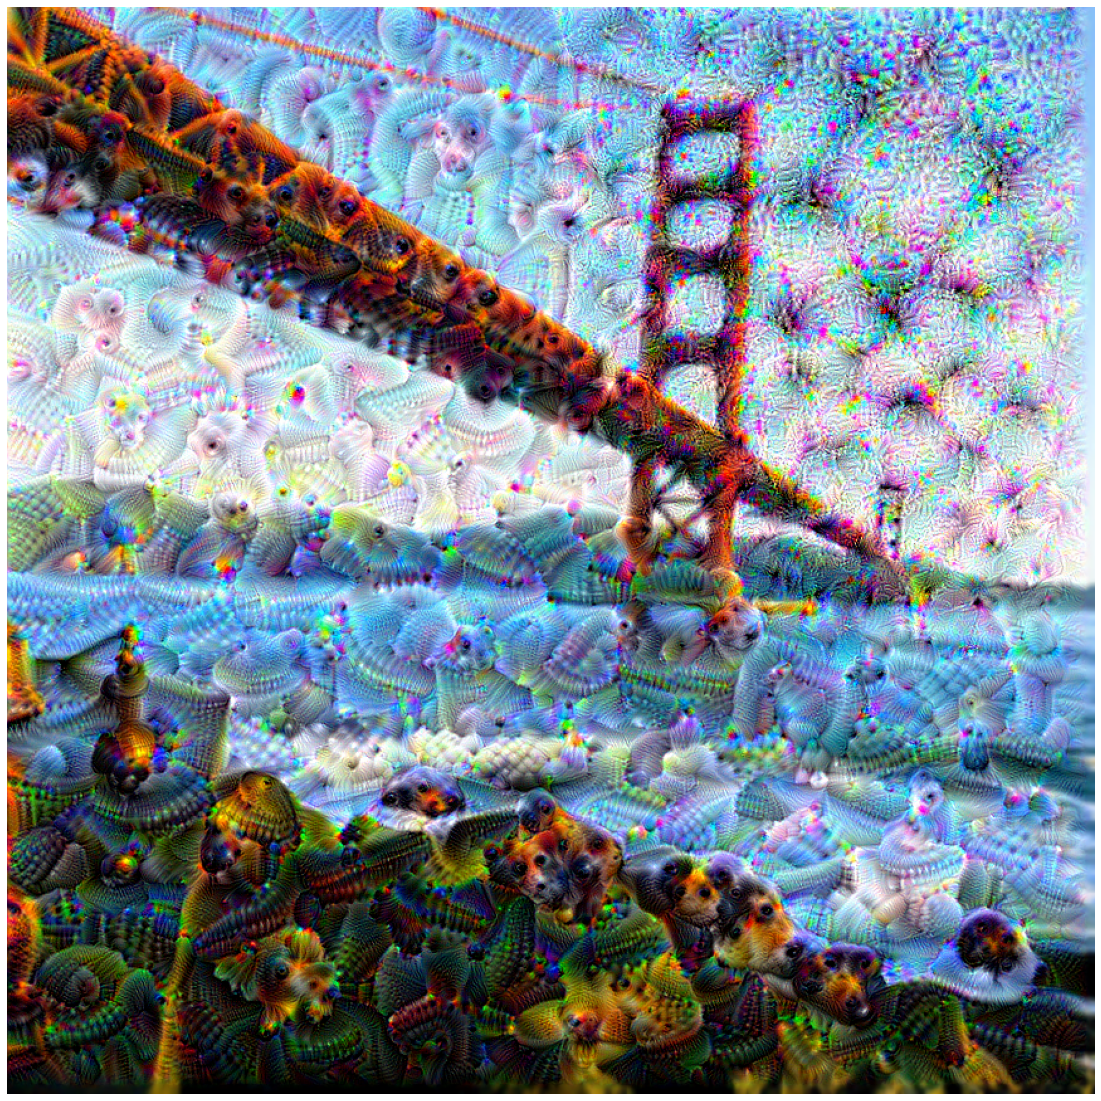

In [78]:
plt.figure(figsize = (20, 20))
plt.imshow(gen_img)
plt.axis('off')
plt.show()